In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# 配置乐队的夏天主题色

purple = (0.22,0.09,0.59) # 紫色
yellow = (0.99,0.89,0.27) # 黄色
green = (0.36,0.94,0.55) # 绿色
blue = (0.06,0.24,0.78) # 蓝色
red = (0.98,0.31,0.36) # 红色

In [3]:
# 读取数据

data1 = pd.read_excel('/Users/linxiaosheng/Downloads/乐队的夏天.xlsx','第一场')
data2 = pd.read_excel('/Users/linxiaosheng/Downloads/乐队的夏天.xlsx','第二场两两PK赛')
data3 = pd.read_excel('/Users/linxiaosheng/Downloads/乐队的夏天.xlsx','第三场累计积分赛')
data4 = pd.read_excel('/Users/linxiaosheng/Downloads/乐队的夏天.xlsx','第四场复活赛')
data5 = pd.read_excel('/Users/linxiaosheng/Downloads/乐队的夏天.xlsx','第五场9进7')

In [4]:
# 观察数据

data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
场数         31 non-null object
出场顺序       31 non-null int64
乐队         31 non-null object
歌曲         31 non-null object
超级乐迷得分     27 non-null float64
专业乐迷得分     27 non-null float64
大众乐迷得分     27 non-null float64
总得分        27 non-null float64
排名         27 non-null float64
是否晋级下一轮    31 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ KB


,场数,出场顺序,乐队,歌曲,超级乐迷得分,专业乐迷得分,大众乐迷得分,总得分,排名,是否晋级下一轮
0,第一场,26,海龟先生,男孩别哭,39.0,34.0,88.0,161.0,1.0,1
1,第一场,22,痛痒乐队,再见杰克,48.0,30.0,81.0,159.0,2.0,1
2,第一场,27,新裤子,别再问我什么是迪斯科,46.0,30.0,83.0,159.0,3.0,1
3,第一场,8,旅行团乐队,逝去的歌,41.0,30.0,83.0,154.0,4.0,1
4,第一场,15,南无乐队,春来了,37.0,28.0,84.0,149.0,5.0,1


In [5]:
# 可以看到有四只乐队是没有得分和排名的，把他们列出来

data1[data1['总得分'].isnull()]

,场数,出场顺序,乐队,歌曲,超级乐迷得分,专业乐迷得分,大众乐迷得分,总得分,排名,是否晋级下一轮
27,第一场,28,MLK麋鹿王国,捉迷藏,NaN,NaN,NaN,NaN,NaN,0
28,第一场,29,茶凉粉,关于你,NaN,NaN,NaN,NaN,NaN,0
29,第一场,30,醒山,欢迎光临,NaN,NaN,NaN,NaN,NaN,0
30,第一场,31,薄荷绿乐队,绵羊,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# 这四只乐队音乐在公开资料中无法获取的比赛的具体成绩，所以得分为空，为了不影响分析，把他们删掉

data1 = data1.dropna(axis = 0)

接下来想分析每只乐队在目前出现的比赛中，谁的整体表现最好？
需要注意的一点是: 
    第一、二场的总分是(50+40+100=190)
    第三场的总分是(50+40+360=450)
    第四场的总分是(40+40+360=440)
    第五场的总分是(50+40+360=450)
所以每场的分数的绝对值是不能简单的横向对比的，需要进行标准化。
标准化的方法是z-score，也就是所谓的标准分

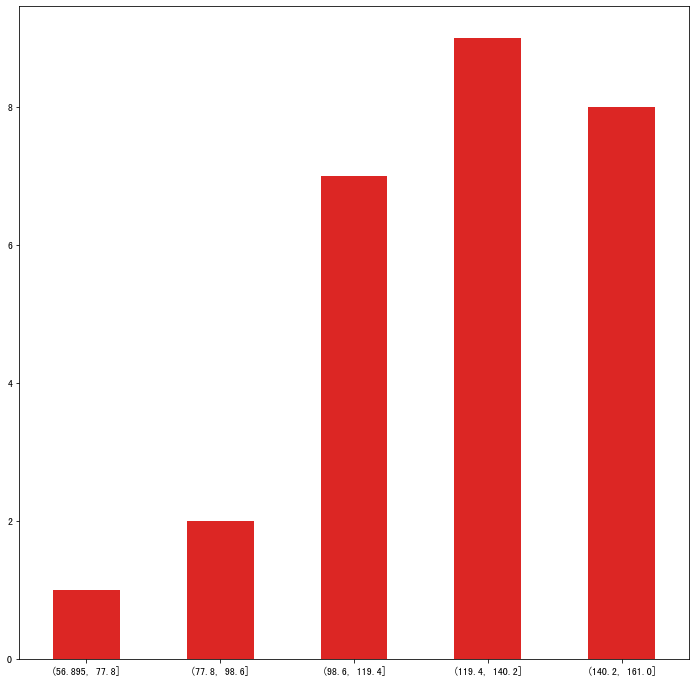

In [7]:
# 对打分的分布进行检验，原则上使用z_score需要数据的分布符合正态分布
# 这里检验的方式比较粗糙，直接绘图看形状，并不是很严谨

fig,ax = plt.subplots(figsize = (12,12))
data1['总得分'].value_counts(bins=5,sort=False).plot.bar(ax=ax)

# 将x轴的标签从竖着转成横着

for tick in ax.get_xticklabels():
    tick.set_rotation(360)
# 把网格线去掉

ax.grid(False)

In [8]:
# 标准分函数定义

def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

In [9]:
# 用循环的方式批量对每场比赛的得分做处理

competition = [data1,data2,data3,data4,data5]

for period in competition:
    period['超级乐迷得分_标准分'] =  z_score_normalize(period['超级乐迷得分'])
    period['专业乐迷得分_标准分'] =  z_score_normalize(period['专业乐迷得分'])
    period['大众乐迷得分_标准分'] =  z_score_normalize(period['大众乐迷得分'])
    period['总得分_标准分'] =  z_score_normalize(period['总得分'])


In [10]:
# 可以看到第一场比赛中晋级的16只队伍的各项标准分

data1.sort_values(by='总得分_标准分', ascending = False)

,场数,出场顺序,乐队,歌曲,超级乐迷得分,专业乐迷得分,大众乐迷得分,总得分,排名,是否晋级下一轮,超级乐迷得分_标准分,专业乐迷得分_标准分,大众乐迷得分_标准分,总得分_标准分
0,第一场,26,海龟先生,男孩别哭,39.0,34.0,88.0,161.0,1.0,1,0.488133,1.154354,1.387279,1.434753
2,第一场,27,新裤子,别再问我什么是迪斯科,46.0,30.0,83.0,159.0,3.0,1,1.524731,0.505030,1.119350,1.355695
1,第一场,22,痛痒乐队,再见杰克,48.0,30.0,81.0,159.0,2.0,1,1.820902,0.505030,1.012178,1.355695
3,第一场,8,旅行团乐队,逝去的歌,41.0,30.0,83.0,154.0,4.0,1,0.784304,0.505030,1.119350,1.158051
4,第一场,15,南无乐队,春来了,37.0,28.0,84.0,149.0,5.0,1,0.191963,0.180368,1.172936,0.960406
5,第一场,1,反光镜,嘿，姑娘,36.0,28.0,84.0,148.0,6.0,1,0.043877,0.180368,1.172936,0.920877
6,第一场,16,九连真人,莫欺少年穷,38.0,32.0,78.0,148.0,7.0,1,0.340048,0.829692,0.851420,0.920877
7,第一场,11,盘尼西林,雨夜曼彻斯特,44.0,32.0,71.0,147.0,8.0,1,1.228560,0.829692,0.476319,0.881348
8,第一场,5,皇后皮箱,人间惆怅客,37.0,28.0,75.0,140.0,9.0,1,0.191963,0.180368,0.690663,0.604646
9,第一场,14,黑撒乐队,陕西美食,27.0,24.0,80.0,131.0,10.0,1,-1.288891,-0.468956,0.958592,0.248886


接下来的分析，希望遵循从整体的局部的方向。
首先看27只乐队在目前5场比赛中所表演的曲目的总得分的标准分的平均分，来衡量乐队的整体表现。
这个数据首先反应乐队的歌在该场比赛中的表现，其次结合多场比赛歌曲的表现，体现乐队的整体成绩。

In [11]:
# 因为每场数据是分开的，所以首先截取原来数据拼在一起成为一个长表

data1_score = data1.loc[:,['场数','乐队','歌曲','排名','超级乐迷得分_标准分',
                           '专业乐迷得分_标准分','大众乐迷得分_标准分','总得分_标准分']]
data2_score = data2.loc[:,['场数','乐队','歌曲','排名','超级乐迷得分_标准分','专业乐迷得分_标准分','大众乐迷得分_标准分',
                           '总得分_标准分']]
data3_score = data3.loc[:,['场数','乐队','歌曲','排名','超级乐迷得分_标准分','专业乐迷得分_标准分','大众乐迷得分_标准分',
                           '总得分_标准分']]
data4_score = data4.loc[:,['场数','乐队','歌曲','排名','超级乐迷得分_标准分','专业乐迷得分_标准分','大众乐迷得分_标准分',
                           '总得分_标准分']]
data5_score = data5.loc[:,['场数','乐队','歌曲','排名','超级乐迷得分_标准分','专业乐迷得分_标准分','大众乐迷得分_标准分',
                           '总得分_标准分']]

total_score = pd.concat([data1_score,data2_score,data3_score,data4_score,data5_score],axis=0)

In [12]:
# 按照乐队这个标签分类计算，计算方式是平均值，计算字段是总得分_标准分，然后按照总得分_标准分排列

total_score_mean = total_score.groupby(['乐队'])[['总得分_标准分']].mean().sort_values(
    by = '总得分_标准分')

total_score_mean

,总得分_标准分
乐队,
BONGBONG邦邦乐团,-2.676254
青年小伙子,-1.569444
VOGUE 5,-1.371800
果味VC,-0.901697
和平和浪,-0.818395
宇宙人,-0.695186
旺福,-0.674124
熊猫眼乐队,-0.620750
面孔乐队,-0.495054


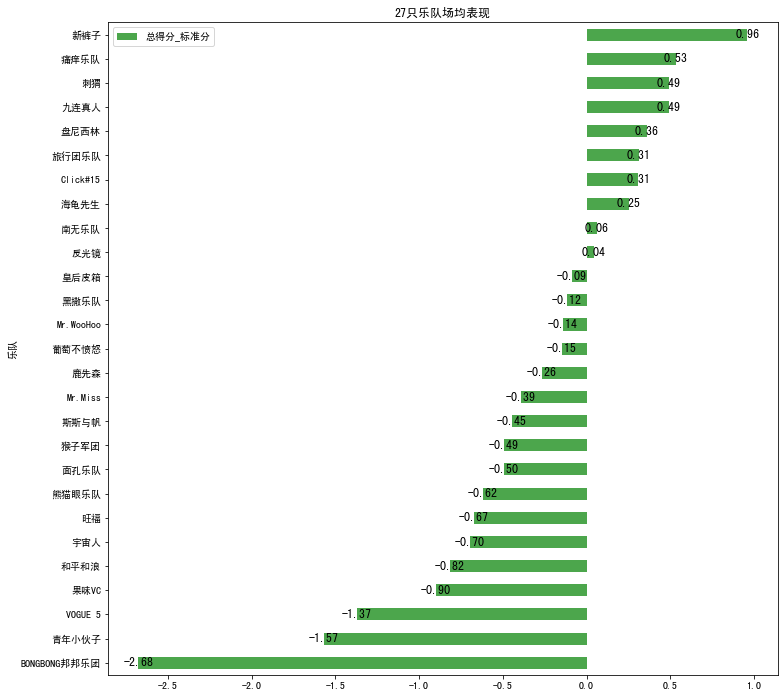

In [13]:
# 对乐队总得分_标准分做可视化

y = np.arange(len(total_score_mean.index))
x = np.array(list(total_score_mean['总得分_标准分']))
fig,ax = plt.subplots(figsize = (12,12))
total_score_mean.plot.barh(ax=ax,alpha=0.7,title='27只乐队场均表现',color = 'g')
for a,b in zip(x,y):
    plt.text(a, b, '%.2f' % a, ha='center', va= 'center',fontsize=12)
ax.grid(False)

新裤子排名第一，这也是在意料之中，生命因你而火热，花火这几首歌在朋友圈都爆了，其他的像刺猬、九连真人、盘尼西林、旅行团、Click#15都表现很稳定，在目前的晋级名单中。但有两支乐队比较奇怪，一个是一度被淘汰的痛痒，竟然排在第二，另一个是一直在线，还把痛痒PK掉的面孔，排名甚至不在前10。

In [14]:
# 把痛痒的成绩拉出来看一下 <再见杰克>和<西湖>都在当轮比赛中取得非常突出的表现，但<我愿意>真的可惜了。

total_score[total_score['乐队'] == '痛痒乐队']

,场数,乐队,歌曲,排名,超级乐迷得分_标准分,专业乐迷得分_标准分,大众乐迷得分_标准分,总得分_标准分
1,第一场,痛痒乐队,再见杰克,2.0,1.820902,0.505030,1.012178,1.355695
7,第二场,痛痒乐队,我愿意,14.0,-0.121894,-1.105836,-1.214141,-1.117903
5,第四场,痛痒乐队,西湖,1.0,0.688102,-0.380693,1.337629,1.245452
3,第五场,痛痒乐队,Don't break my heart,4.0,1.186342,-1.340308,0.879563,0.645986


In [15]:
# 相较于其他只表演了一场但排名中等的队伍，面孔因被<张三的歌>垫底，一举拖垮，也因此惨遭淘汰。

total_score[total_score['乐队'] == '面孔乐队']

,场数,乐队,歌曲,排名,超级乐迷得分_标准分,专业乐迷得分_标准分,大众乐迷得分_标准分,总得分_标准分
13,第一场,面孔乐队,梦,14.0,1.672816,1.479016,-1.024086,0.051241
6,第二场,面孔乐队,流年,10.0,-0.121894,0.402122,-0.161885,-0.047870
16,第二场复活赛,面孔乐队,幻觉,2.0,0.690731,-1.105836,-0.566599,-0.498410
1,第三场上,面孔乐队,欢乐颂,3.0,-0.234948,0.490644,0.198886,0.208862
12,第三场下,面孔乐队,港湾,6.0,0.619409,-0.672364,-0.306693,-0.271972
8,第五场,面孔乐队,张三的歌,9.0,-1.810733,-0.985521,-2.433138,-2.412178


接下来 我想研究，在超级乐迷、专业乐迷和大众乐迷各自眼里，哪些乐队是他们喜欢的，他们共同喜欢的，和差异很大的乐队分别是哪些

In [16]:
# 代码逻辑和前面选总得分作为计算字段的逻辑一样，只不过这次选取单个群体得分作为指标

super_score_mean = total_score.groupby(['乐队'])[['超级乐迷得分_标准分']].mean().sort_values(
    by = '超级乐迷得分_标准分')
pro_score_mean = total_score.groupby(['乐队'])[['专业乐迷得分_标准分']].mean().sort_values(
    by = '专业乐迷得分_标准分')
public_score_mean = total_score.groupby(['乐队'])[['大众乐迷得分_标准分']].mean().sort_values(
    by = '大众乐迷得分_标准分')

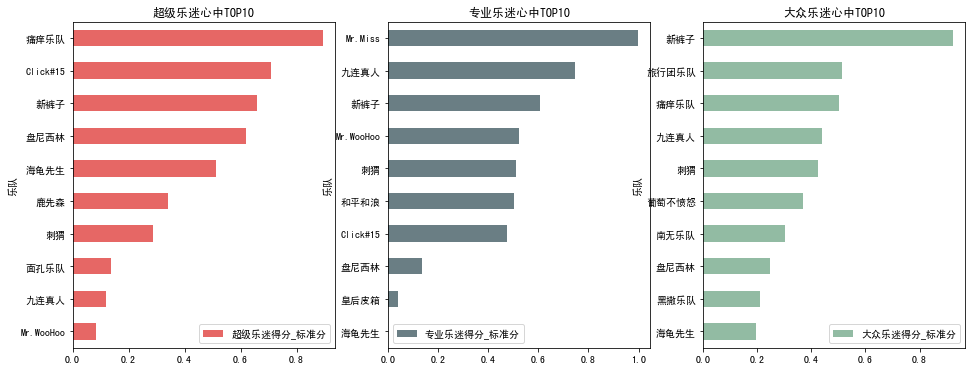

In [17]:
fig,ax = plt.subplots(1,3,figsize = (16,6))

super_score_mean.tail(10).plot.barh(ax=ax[0],color = '#dc2624',alpha=0.7,title='超级乐迷心中TOP10',grid=False)
pro_score_mean.tail(10).plot.barh(ax=ax[1],color = '#2b4750',alpha=0.7,title='专业乐迷心中TOP10',grid=False)
public_score_mean.tail(10).plot.barh(ax=ax[2],color = '#649E7D',alpha=0.7,title='大众乐迷心中TOP10',grid=False)



In [18]:
# 选出各自心目中前10的乐队，因为是按照得分升序排列的，所以最后面的10只就是TOP10

super_score_mean_top10 = super_score_mean.tail(10)
pro_score_mean_top10 = pro_score_mean.tail(10)
public_score_mean_top10 = public_score_mean.tail(10)


# 运用集合运算来获得希望的结果
super10 = set(super_score_mean_top10.index)
pro10 = set(pro_score_mean_top10.index)
pub10 = set(public_score_mean_top10.index)

cross = super10 & pro10 & pub10
print('同时在三个群体中位列心目前十的乐队是:\n',cross)
print('\n')

print('下面一起来读绕口令:\n')

super_pro = super10 - pro10
print('在超级乐迷心中前十，但不在专业乐迷心中的前十乐队是:\n',super_pro)
print('\n')

super_pub = super10 - pub10
print('在超级乐迷心中前十，但不在大众乐迷心中的前十乐队是:\n',super_pub)
print('\n')

pro_super = pro10 - super10
print('在专业乐迷心中前十，但不在超级乐迷心中的前十乐队是:\n',pro_super)
print('\n')

pro_pub = pro10 - pub10
print('在专业乐迷心中前十，但不在大众乐迷心中的前十乐队是:\n',pro_pub)
print('\n')

pub_super = pub10 - super10
print('在大众乐迷心中前十，但不在超级乐迷心中的前十乐队是:\n',pub_super)
print('\n')

pub_pro = pub10 - pro10
print('在大众乐迷心中前十，但不在专业乐迷心中的前十乐队是:\n',pub_pro)
print('\n')


同时在三个群体中位列心目前十的乐队是:
 {'九连真人', '海龟先生', '刺猬', '盘尼西林', '新裤子'}


下面一起来读绕口令:

在超级乐迷心中前十，但不在专业乐迷心中的前十乐队是:
 {'痛痒乐队', '面孔乐队', '鹿先森'}


在超级乐迷心中前十，但不在大众乐迷心中的前十乐队是:
 {'Mr.WooHoo', 'Click#15', '面孔乐队', '鹿先森'}


在专业乐迷心中前十，但不在超级乐迷心中的前十乐队是:
 {'Mr.Miss', '和平和浪', '皇后皮箱'}


在专业乐迷心中前十，但不在大众乐迷心中的前十乐队是:
 {'Click#15', '皇后皮箱', 'Mr.Miss', '和平和浪', 'Mr.WooHoo'}


在大众乐迷心中前十，但不在超级乐迷心中的前十乐队是:
 {'旅行团乐队', '黑撒乐队', '葡萄不愤怒', '南无乐队'}


在大众乐迷心中前十，但不在专业乐迷心中的前十乐队是:
 {'旅行团乐队', '葡萄不愤怒', '南无乐队', '痛痒乐队', '黑撒乐队'}




需要说明的是，因为有些乐队在第一轮就被淘汰了，例如鹿先森、和平和浪、葡糖不愤怒，使得他们单场表现的成绩就代表了他们的整体水平，这是有失偏颇的，因为比赛本身是淘汰和晋级的形式，越往后面对的竞争环境会越加激烈，所以得分会更能代表乐队实力。


接下来对比较熟悉的9只乐队的每期排名做可视化，直观地展现他们在每期表现的升降。


In [19]:
print('第五场中表演的九只乐队分别是:')
data5['乐队']

第五场中表演的九只乐队分别是:


0    Click#15
1        盘尼西林
2         新裤子
3        痛痒乐队
4          刺猬
5        九连真人
6       旅行团乐队
7        海龟先生
8        面孔乐队
Name: 乐队, dtype: object

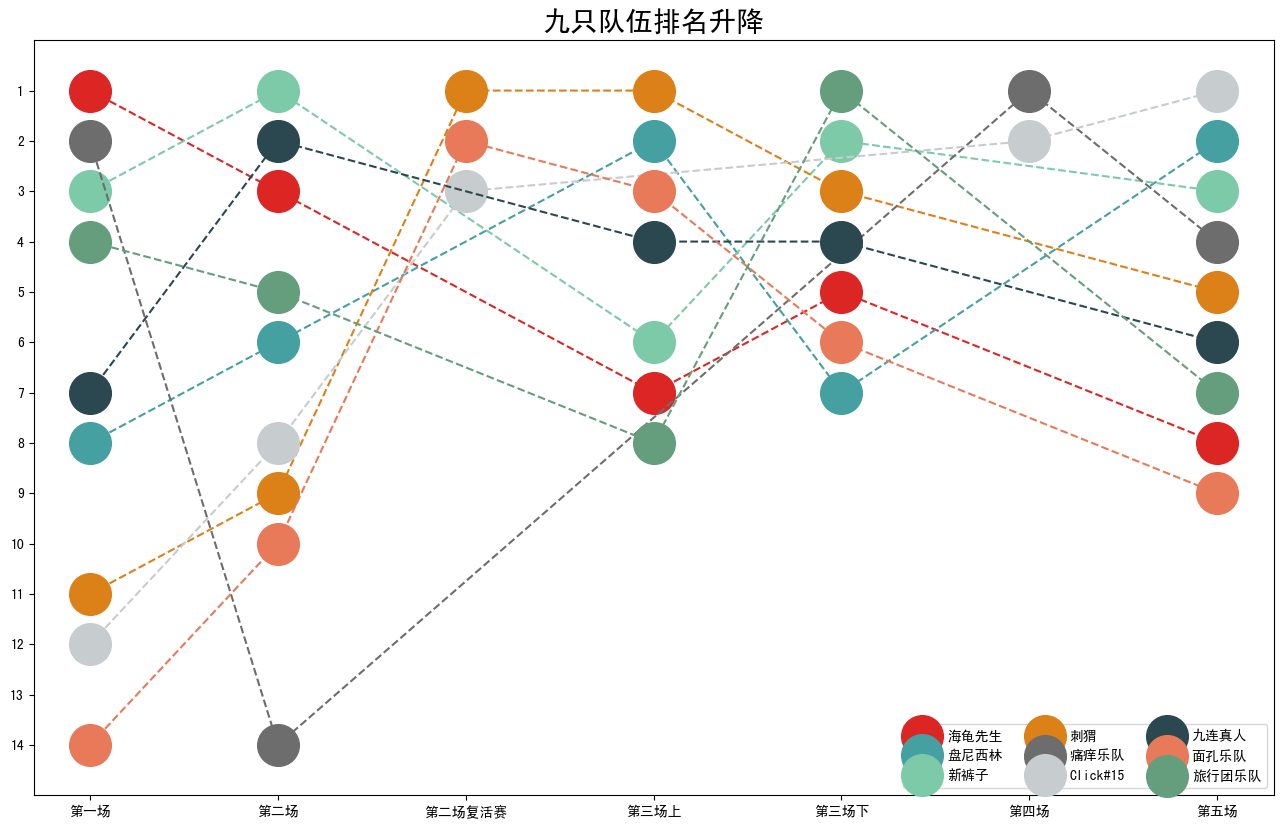

In [20]:
# 接下来对9只乐队的排名升降进行可视化

# 首先从31只乐队中选出晋级的乐队，然后这次只用到了排名，乐队和场次这三个字段

top9_rank = total_score[total_score['乐队'].isin(list(data5['乐队']))].iloc[:,[0,1,3]]

# 把数据按场数排序

top9_rank = top9_rank.sort_values(by='场数')


fig = plt.figure( figsize=(16,10), dpi=100 )
ax = fig.add_subplot(1,1,1)

order = ['第一场','第二场','第二场复活赛','第三场上','第三场下','第四场','第五场']

ax.plot(order,[0,0,0,0,0,0,0],c='w')

hgxs = top9_rank[top9_rank['乐队']=='海龟先生'].iloc[[0,3,1,2,4]]
ax.plot('场数','排名',data=hgxs,ls ='--',marker='o',markersize=30,label='海龟先生')


pnxl = top9_rank[top9_rank['乐队']=='盘尼西林'].iloc[[0,3,1,2,4]]
ax.plot('场数','排名',data=pnxl,ls ='--',marker='o',markersize=30,label='盘尼西林')

xkz = top9_rank[top9_rank['乐队']=='新裤子'].iloc[[0,3,1,2,4]]
ax.plot('场数','排名',data=xkz,ls ='--',marker='o',markersize=30,label='新裤子')

cw = top9_rank[top9_rank['乐队']=='刺猬'].iloc[[0,3,4,1,2,5]]
ax.plot('场数','排名',data=cw,ls ='--',marker='o',markersize=30,label='刺猬')

ty = top9_rank[top9_rank['乐队']=='痛痒乐队'].iloc[[0,1,3,2]]
ax.plot('场数','排名',data=ty,ls ='--',marker='o',markersize=30,label='痛痒乐队')

click = top9_rank[top9_rank['乐队']=='Click#15'].iloc[[0,1,2,4,3]]
ax.plot('场数','排名',data=click,ls ='--',marker='o',markersize=30,label='Click#15')

jlzr = top9_rank[top9_rank['乐队']=='九连真人'].iloc[[0,3,1,2,4]]
ax.plot('场数','排名',data=jlzr,ls ='--',marker='o',markersize=30,label='九连真人')

mk = top9_rank[top9_rank['乐队']=='面孔乐队'].iloc[[0,3,4,1,2,5]]
ax.plot('场数','排名',data=mk,ls ='--',marker='o',markersize=30,label='面孔乐队')

lxt = top9_rank[top9_rank['乐队']=='旅行团乐队'].iloc[[0,3,1,2,4]]
ax.plot('场数','排名',data=lxt,ls ='--',marker='o',markersize=30,label='旅行团乐队')

ax.set_xticks(np.arange(len(order)))
ax.set_yticks(np.arange(1,15))
ax.set_xticklabels(order)
ax.invert_yaxis()
ax.set_ylim(15,0)
ax.grid(False)
plt.title('九只队伍排名升降',fontdict = {'fontsize':20})
ax.legend(ncol=3)


新裤子的发挥是较为稳定的，除了第三场上和Cindy合作的音乐形式较为新颖，让观众一时难以接受之外，在各个场次都获得非常靠前的成绩。
同样稳定的还有九连真人，一直稳稳的在中间，此外第二场改编李宗盛大哥的凡人歌，现场炸裂，表现超出期待。

表现越来越好的有两只乐队：
1.刺猬
2.Click#15
刺猬可谓是低开高走，复活赛中凭借白日梦蓝稳稳防守住黑撒乐队的挑战，女神赛中和斯斯与帆的合作更是获得了全场最佳。
Click#15虽然在第二场和面孔的PK赛中被淘汰，但又杀了回来，而且第五场演绎beyond的碑面派对，首次赢得第一名。

另外面孔乐队的处境一直比较尴尬，看他们的音乐对这一代人确实存在一些隔阂。

最后还有我很喜欢的乐队，海龟先生。第一场比赛在31只乐队中位列第一，后面他们做了许多创意，还有想通过音乐表达自己的想法，可惜没有被buy in.

## 歌曲的分析

说完了乐队，我想再看看仅从作品的角度能发现什么有趣的结论

这次采用另一个计算的方式，就是将得票数/总票数=得票率，把作品的得分变成一个0-1之间的数字，以此来进行比较。

In [21]:
# 定义归一化的函数

def normalize(series,x_max):

    return series.apply(lambda x: x/x_max)



In [22]:
# 对不同总分不同类别的得分应用归一化函数

for data in [data1,data2,data5]:
    data['超级乐迷_归一分'] = normalize(data['超级乐迷得分'],50)

data3['超级乐迷_归一分'] = normalize(data3['超级乐迷得分'],60)
data4['超级乐迷_归一分'] = normalize(data4['超级乐迷得分'],40)

for data in [data1,data2,data3,data4,data5]:
    data['专业乐迷_归一分'] = normalize(data['专业乐迷得分'],40)
    
for data in [data1,data2]:
    data['大众乐迷_归一分'] = normalize(data['大众乐迷得分'],100)
for data in [data3,data4,data5]:
    data['大众乐迷_归一分'] = normalize(data['大众乐迷得分'],360)

In [23]:
# 看一下效果
data4

,场数,出场顺序,乐队,歌曲,超级乐迷得分,专业乐迷得分,大众乐迷得分,总得分,排名,是否晋级下一轮,超级乐迷得分_标准分,专业乐迷得分_标准分,大众乐迷得分_标准分,总得分_标准分,超级乐迷_归一分,专业乐迷_归一分,大众乐迷_归一分
0,第四场,1,果味VC,日落,26,20,201,247,5,0,-1.376205,-0.380693,-0.739630,-0.787355,0.650,0.50,0.558333
1,第四场,2,Mr.Miss,秋别,35,22,242,299,3,0,0.481672,0.190347,-0.094421,-0.042947,0.875,0.55,0.672222
2,第四场,3,宇宙人,一万小时,29,18,204,251,4,0,-0.756913,-0.951734,-0.692420,-0.730093,0.725,0.45,0.566667
3,第四场,4,斯斯与帆,动机zoo,31,20,188,239,6,0,-0.344051,-0.380693,-0.944209,-0.901879,0.775,0.50,0.522222
4,第四场,5,Click#15,How come u leave me like this,39,28,320,387,2,1,1.307394,1.903467,1.133051,1.216821,0.975,0.70,0.888889
5,第四场,6,痛痒乐队,西湖,36,20,333,389,1,1,0.688102,-0.380693,1.337629,1.245452,0.900,0.50,0.925000


In [24]:
# 批量对总得分应用归一化函数

match_total = {'data1':190,'data2':190,'data3':460,'data4':440,'data5':450}
data_list = [data1,data2,data3,data4,data5]

for i,data in enumerate(data_list):
    data['总得分_归一分'] = normalize(data['总得分'],match_total['data'+ str(i+1)])

In [25]:
# 定义需要的列，然后将各个分散的数据合并在一起

col_index = [3,-4,-3,-2,-1]
total_nor_score = pd.DataFrame()
for data in data_list:
    total_nor_score = total_nor_score.append([data.iloc[:,col_index]])

In [26]:
# 把数据按照总得分_归一分降序排列
total_nor_score.sort_values(by = '总得分_归一分',ascending=False)

,歌曲,超级乐迷_归一分,专业乐迷_归一分,大众乐迷_归一分,总得分_归一分
13,Bye Bye,0.950000,0.95,0.883333,0.897826
14,花火,0.860000,0.90,0.900000,0.889474
5,西湖,0.900000,0.50,0.925000,0.884091
0,椑面派对,0.940000,0.90,0.872222,0.882222
10,生命因你而火热,0.900000,0.80,0.886111,0.880435
4,How come u leave me like this,0.975000,0.70,0.888889,0.879545
3,凡人歌,0.880000,0.85,0.890000,0.878947
1,红河谷,0.920000,0.80,0.880556,0.877778
2,一场游戏一场梦,0.880000,0.75,0.883333,0.871111
3,Don't break my heart,0.980000,0.50,0.897222,0.871111


In [27]:
# 看看数据整体的描述
total_nor_score.describe()

,超级乐迷_归一分,专业乐迷_归一分,大众乐迷_归一分,总得分_归一分
count,78.000000,78.000000,78.000000,78.000000
mean,0.772735,0.694872,0.692208,0.715146
std,0.117211,0.148933,0.156995,0.121904
min,0.400000,0.200000,0.290000,0.300000
25%,0.687500,0.600000,0.600000,0.647368
50%,0.766667,0.700000,0.706389,0.722483
75%,0.865000,0.800000,0.830000,0.823626
max,0.980000,0.950000,0.925000,0.897826


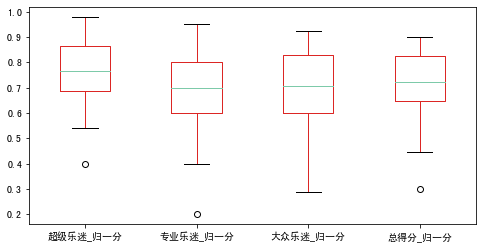

In [28]:
# 运用箱型图可以看到各组给分的分布，其中蓝线是平均分，圆圈是最小值
fig,ax = plt.subplots(1,1,figsize = (8,4))
total_nor_score.boxplot(ax = ax,grid=False)

从上面的图和数据不难看出，超级乐迷给分的范围相对较高，也就是所谓的手松，而专业乐迷擅长给低分，最低的时候只给出了20%比例的票，大众乐迷相对克制，最高分也仅仅给出了92%的票，所谓的众口难调。总得分的平均数是0.71，意味着所有歌曲平均下来能拿到71%的票，也是挺不容易的。

最后再来看看，得票率前10的歌曲吧

截止第五期，最受欢迎的10首歌分别是:
 ['一场游戏一场梦', "Don't break my heart", '红河谷', '凡人歌', 'How come u leave me like this', '生命因你而火热', '椑面派对', '西湖', '花火', 'Bye Bye']


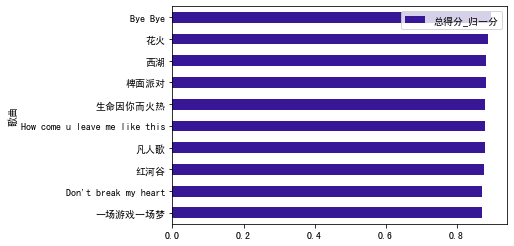

In [29]:
top10_songs = total_nor_score.sort_values(by = '总得分_归一分').tail(10)
top10_songs.plot.barh(x='歌曲',y='总得分_归一分',color=purple)
print('截止第五期，最受欢迎的10首歌分别是:\n',list(top10_songs['歌曲']))

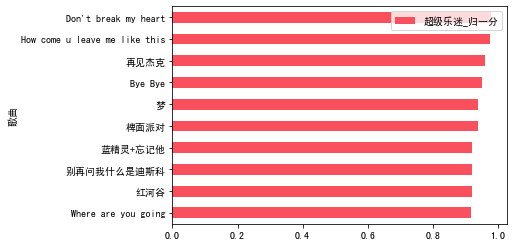

In [30]:
total_nor_score.sort_values(by = '超级乐迷_归一分').tail(10).plot.barh(x='歌曲',y='超级乐迷_归一分',color=red)

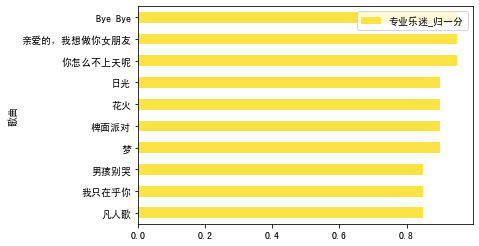

In [31]:
total_nor_score.sort_values(by = '专业乐迷_归一分').tail(10).plot.barh(x='歌曲',y='专业乐迷_归一分',color=yellow)

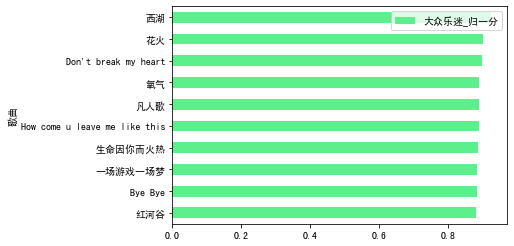

In [32]:
total_nor_score.sort_values(by = '大众乐迷_归一分').tail(10).plot.barh(x='歌曲',y='大众乐迷_归一分',color=green)

整体回顾完了，最后单独分析两个问题。
第一个是为什么<我愿意>这首歌表现不好呢？

In [33]:
total_nor_score[total_nor_score['歌曲'] == '我愿意']

,歌曲,超级乐迷_归一分,专业乐迷_归一分,大众乐迷_归一分,总得分_归一分
7,我愿意,0.78,0.65,0.53,0.621053


可以看到虽然在节目中，矛头似乎指向了专业乐迷，但实际上，专业乐迷给票的比例比大众乐迷是要高的，真正不喜欢的是大众乐迷，只给出了一半的票数。

第二个问题是，谁在不喜欢海龟先生？

In [34]:
total_nor_score_t = pd.merge(total_nor_score, total_score[['乐队','歌曲']], on='歌曲')
total_nor_score_t[total_nor_score_t['乐队'] == '海龟先生']

,歌曲,超级乐迷_归一分,专业乐迷_归一分,大众乐迷_归一分,总得分_归一分,乐队
0,男孩别哭,0.780000,0.85,0.880000,0.847368,海龟先生
32,日光,0.880000,0.90,0.820000,0.852632,海龟先生
54,咿呀呀,0.683333,0.40,0.677778,0.654348,海龟先生
61,Where are you going,0.916667,0.70,0.702778,0.730435,海龟先生
76,蓝精灵+忘记他,0.920000,0.60,0.816667,0.808889,海龟先生


咿呀呀这首歌拖累了海龟的整体平均分，而在这首歌中，专业乐迷给票的比例是最低的。
看看每组分别对海龟先生的作品给出的平均分：

In [35]:
total_nor_score_t[total_nor_score_t['乐队'] == '海龟先生'].mean()

超级乐迷_归一分    0.836000
专业乐迷_归一分    0.690000
大众乐迷_归一分    0.779444
总得分_归一分     0.778734
dtype: float64

如果不看咿呀呀这首歌，那么各组给出的平均分是多少

In [36]:
total_nor_score_t.iloc[[0,32,61,76]].mean()

超级乐迷_归一分    0.874167
专业乐迷_归一分    0.762500
大众乐迷_归一分    0.804861
总得分_归一分     0.809831
dtype: float64

结论仍然是专业乐迷

最后再看看，每个队伍归一分的平均分

In [37]:
total_nor_score_t.groupby('乐队').mean().sort_values(by = '总得分_归一分',ascending = False).head(9)

,超级乐迷_归一分,专业乐迷_归一分,大众乐迷_归一分,总得分_归一分
乐队,,,,
新裤子,0.858667,0.790000,0.840444,0.837746
痛痒乐队,0.905000,0.600000,0.790556,0.803274
九连真人,0.794667,0.820000,0.793444,0.794748
刺猬,0.805556,0.791667,0.763796,0.785010
旅行团乐队,0.772000,0.690000,0.804000,0.781349
海龟先生,0.836000,0.690000,0.779444,0.778734
盘尼西林,0.854667,0.720000,0.756222,0.778141
Click#15,0.863000,0.740000,0.730222,0.766038
南无乐队,0.710000,0.700000,0.725000,0.715789


In [38]:
total_score_mean.sort_values(by = '总得分_标准分',ascending= False).head(9)

,总得分_标准分
乐队,
新裤子,0.959756
痛痒乐队,0.532308
刺猬,0.493793
九连真人,0.491762
盘尼西林,0.359884
旅行团乐队,0.314109
Click#15,0.308350
海龟先生,0.251736
南无乐队,0.062046


可以看到和之前用标准分算出来的9只乐队是一样的，仅在排名里面有些微差别

最后预测一下最终Hot5的名单，简单的猜测是，上面两种计算方式中排列前五的乐队：

In [42]:
hot5_nor = total_nor_score_t.groupby('乐队').mean().sort_values(by = '总得分_归一分',ascending = False).head(5).index

In [41]:
hot5_z = total_score_mean.sort_values(by = '总得分_标准分',ascending= False).head(5).index

In [43]:
set(hot5_nor) & set(hot5_z)

{'九连真人', '刺猬', '新裤子', '痛痒乐队'}

结果只有4只乐队是重合的，剩余的三只乐队中，旅行团在归一分排序中在盘尼西林前面，而标准分落后，Click15两种计算方式均在最后。因此，第五名的悬念应该是在旅行团乐队和盘尼西林之间，至于最后是谁，就让今晚拭目以待吧！